v3.1.4 & v3.1.5

In [1]:
import glob
import os
import sys

%matplotlib notebook
#%matplotlib inline
#%matplotlib qt

import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import matplotlib.colors as mcolors
import matplotlib.cm as cm


import math
import pandas as pd
import numpy as np
from numpy import linspace
from scipy import interpolate

from IPython.display import display

# Data files

In [2]:
observable = ['background','dL','rBAO','lensedCls','matterpower']

v4_path = '/home/ealmaraz/software/camb/bde/v3.1.4/outputs/tests/bdev3.1.4_test1_'
v4_info = {}#; fint_python_parallel = {}

v5_path = '/home/ealmaraz/software/camb/bde/v3.1.5/outputs/tests/bdev3.1.5_test1_'
v5_info = {}#; fint_fortran_parallel = {}

#info in fortran runs
for obs in observable:
    fname = v4_path+obs+'.dat'
                        
    if obs in ['background','dL','rBAO']: 
        v4_info[obs] = pd.read_csv(fname,sep="\s+",skiprows=0,header=None)
    else:
        v4_info[obs] = pd.read_csv(fname,sep="\s+",skiprows=1,header=None)          
                
#info in python runs            
for obs in observable:
    fname = v5_path+obs+'.dat'
    
    if obs in ['background','dL','rBAO']: 
        v5_info[obs] = pd.read_csv(fname,sep="\s+",skiprows=0,header=None)
    else:
        v5_info[obs] = pd.read_csv(fname,sep="\s+",skiprows=1,header=None)

# Equation of state

In [3]:
residuals_w = 100*(v5_info['background'][11]-v4_info['background'][11])/v4_info['background'][11]
np.sum(residuals_w)

0.0

<IPython.core.display.Javascript object>


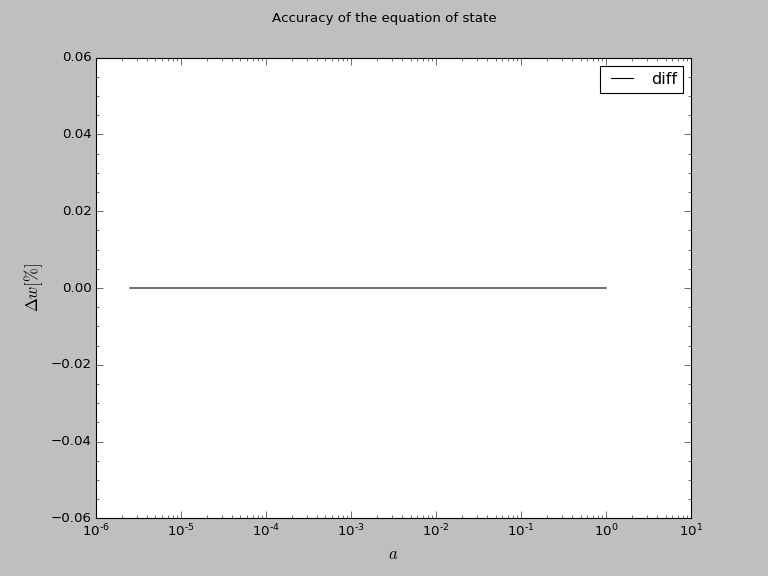

In [4]:
fig = plt.figure(figsize=(9.6,7.2))
fig.suptitle('Accuracy of the equation of state',fontsize=12)

ax1 = plt.subplot()

#since the z's points are the same in all files we don't need to perform any interpolation
plt.plot(v4_info['background'][0],100*(v5_info['background'][11]-v4_info['background'][11])/v4_info['background'][11],
         '-k',label='diff')

plt.xlabel('$a$',fontsize=15)
#plt.xlim([0.00001,1.5])
plt.xscale('log')
plt.ylabel('$\Delta w[\%]$',fontsize=15)
#plt.ylim([-0.16,0.15])
minorLocatorY = AutoMinorLocator()
ax1.yaxis.set_minor_locator(minorLocatorY)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3, color='black')

plt.legend()

# Density parameter

In [5]:
residuals_w = 100*(v5_info['background'][10]-v4_info['background'][10])/v4_info['background'][10]
np.sum(residuals_w)

0.0

<IPython.core.display.Javascript object>


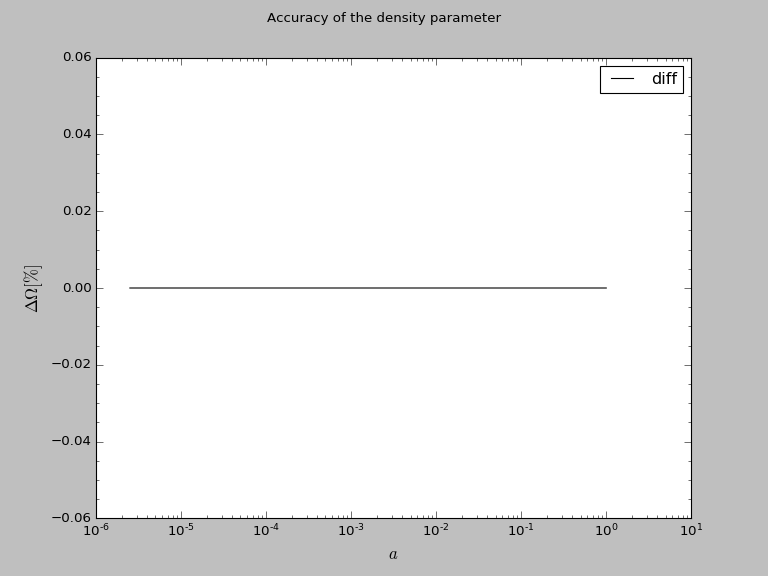

In [6]:
fig = plt.figure(figsize=(9.6,7.2))
fig.suptitle('Accuracy of the density parameter',fontsize=12)

ax1 = plt.subplot()

#since the z's points are the same in all files we don't need to perform any interpolation
plt.plot(v4_info['background'][0],100*(v5_info['background'][10]-v4_info['background'][10])/v4_info['background'][10],
         '-k',label='diff')

plt.xlabel('$a$',fontsize=15)
#plt.xlim([0.00001,1.5])
plt.xscale('log')
plt.ylabel('$\Delta \Omega[\%]$',fontsize=15)
#plt.ylim([-0.16,0.15])
minorLocatorY = AutoMinorLocator()
ax1.yaxis.set_minor_locator(minorLocatorY)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3, color='black')

plt.legend()

# Distance modulus (SNeIa)

In [7]:
residuals_mu = 100*(v5_info['dL'][4]-v4_info['dL'][4])/v4_info['dL'][4]
np.sum(residuals_mu)

0.0

<IPython.core.display.Javascript object>


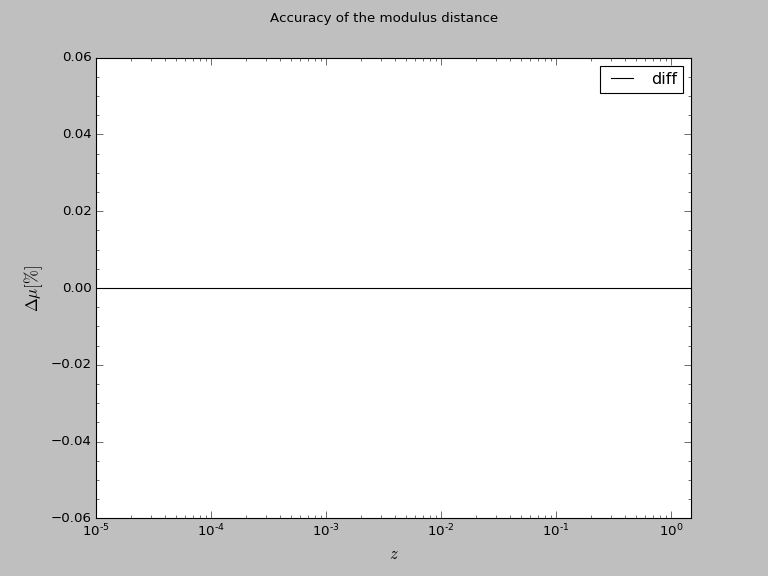

In [8]:
fig = plt.figure(figsize=(9.6,7.2))
fig.suptitle('Accuracy of the modulus distance',fontsize=12)

ax1 = plt.subplot()

#since the z's points are the same in all files we don't need to perform any interpolation
plt.plot(v4_info['dL'][1],100*(v5_info['dL'][4]-v4_info['dL'][4])/v4_info['dL'][4],
         '-k',label='diff')
#plt.plot(v4_info['dL'][1],v4_info['dL'][4],'-r',label='v3.1.4')
#plt.plot(v5_info['dL'][1],v5_info['dL'][4],'-k',label='v3.1.5')

plt.xlabel('$z$',fontsize=15)
plt.xlim([0.00001,1.5])
plt.xscale('log')
plt.ylabel('$\Delta \mu[\%]$',fontsize=15)
#plt.ylim([-0.16,0.15])
minorLocatorY = AutoMinorLocator()
ax1.yaxis.set_minor_locator(minorLocatorY)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3, color='black')

plt.legend()

# BAO ratio

In [9]:
residuals_rBAO = 100*(v5_info['rBAO'][4]-v4_info['rBAO'][4])/v4_info['rBAO'][4]
np.sum(residuals_rBAO)

0.0

<IPython.core.display.Javascript object>


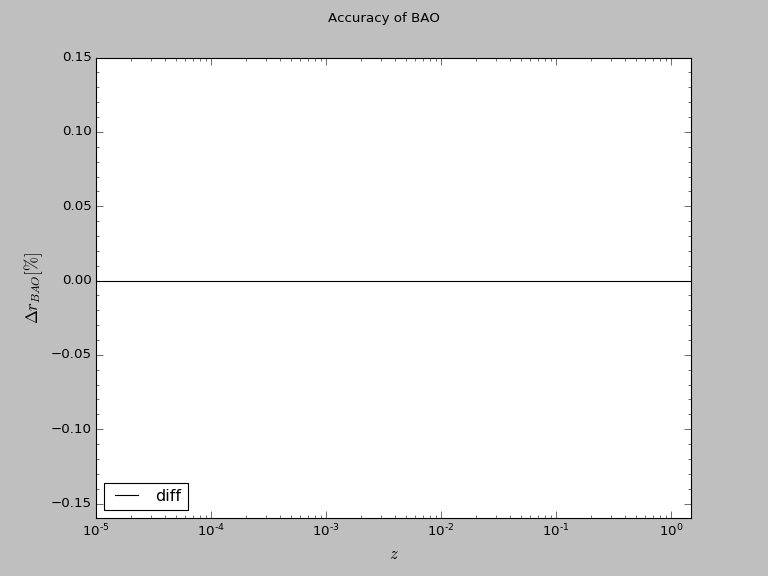

In [10]:
fig = plt.figure(figsize=(9.6,7.2))
fig.suptitle('Accuracy of BAO',fontsize=12)

ax1 = plt.subplot()
plt.plot(v4_info['rBAO'][1],100*(v5_info['rBAO'][4]-v4_info['rBAO'][4])/v4_info['rBAO'][4],
         '-k',label='diff')

plt.xlabel('$z$',fontsize=15)
plt.xlim([0.00001,1.5])
plt.xscale('log')
plt.ylabel('$\Delta r_{BAO}[\%]$',fontsize=15)
plt.ylim([-0.16,0.15])
minorLocatorY = AutoMinorLocator()
ax1.yaxis.set_minor_locator(minorLocatorY)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3, color='black')

plt.legend(loc='lower left')

# CMB-TT spectrum

In [11]:
residuals_CTT = 100*(v5_info['lensedCls'][1]-v4_info['lensedCls'][1])/v4_info['lensedCls'][1]
np.sum(residuals_CTT)

-0.1600315718196204

<IPython.core.display.Javascript object>


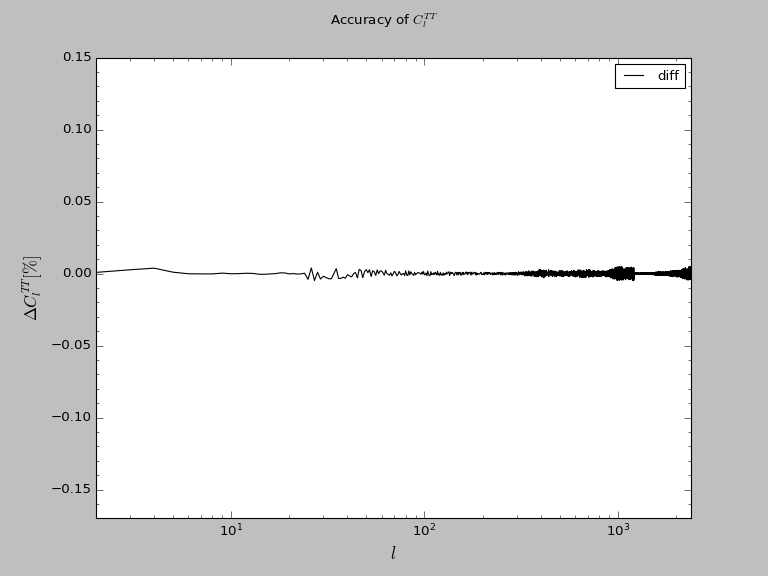

In [12]:
fig = plt.figure(figsize=(9.6,7.2))
fig.suptitle('Accuracy of $C_l^{TT}$',fontsize=12)

ax1 = plt.subplot()

plt.plot(v4_info['lensedCls'][0],100*(v5_info['lensedCls'][1]-v4_info['lensedCls'][1])/v4_info['lensedCls'][1],
         '-k',label='diff')

plt.xlabel('$l$',fontsize=15)
plt.xlim([2,2400])
plt.xscale('log')
plt.ylabel('$\Delta C_l^{TT}[\%]$',fontsize=15)
plt.ylim([-0.17,0.15])
minorLocatorY = AutoMinorLocator()
ax1.yaxis.set_minor_locator(minorLocatorY)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3, color='black')

plt.legend(prop={'size':12})

# CMB-EE spectrum

In [13]:
residuals_CEE = 100*(v5_info['lensedCls'][2]-v4_info['lensedCls'][2])/v4_info['lensedCls'][2]
np.sum(residuals_CEE)

0.13070190564507939

<IPython.core.display.Javascript object>


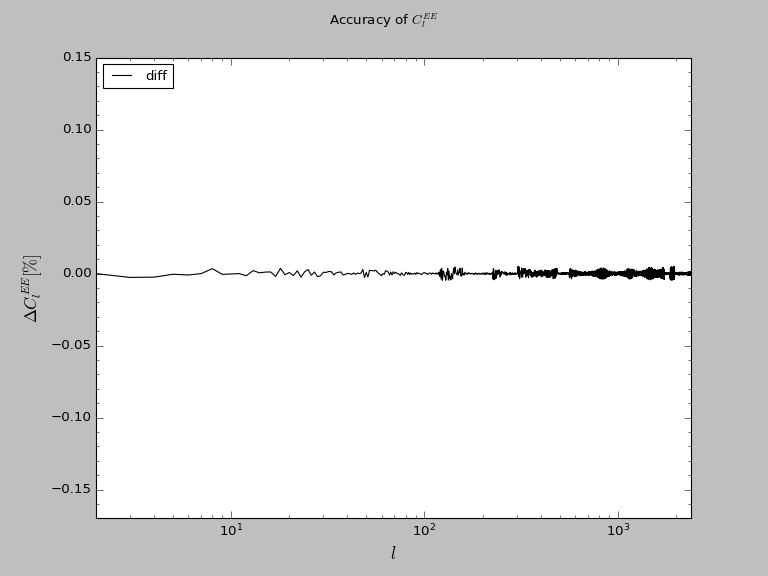

In [14]:
fig = plt.figure(figsize=(9.6,7.2))
fig.suptitle('Accuracy of $C_l^{EE}$',fontsize=12)

ax1 = plt.subplot()
plt.plot(v4_info['lensedCls'][0],100*(v5_info['lensedCls'][2]-v4_info['lensedCls'][2])/v4_info['lensedCls'][2],
         '-k',label='diff')

plt.xlabel('$l$',fontsize=15)
plt.xlim([2,2400])
plt.xscale('log')
plt.ylabel('$\Delta C_l^{EE}[\%]$',fontsize=15)
plt.ylim([-0.17,0.15])
minorLocatorY = AutoMinorLocator()
ax1.yaxis.set_minor_locator(minorLocatorY)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3, color='black')

plt.legend(loc = 'upper left',prop={'size':12})

# CMB-TE spectrum

In [15]:
residuals_CTE = 100*(v5_info['lensedCls'][4]-v4_info['lensedCls'][4])/v4_info['lensedCls'][4]
np.sum(residuals_CTE)

0.034475728088469264

<IPython.core.display.Javascript object>


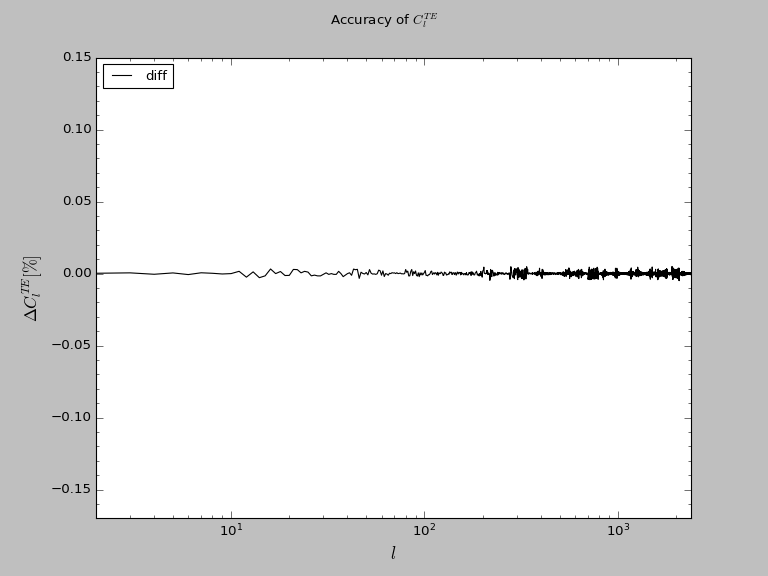

In [16]:
fig = plt.figure(figsize=(9.6,7.2))
fig.suptitle('Accuracy of $C_l^{TE}$',fontsize=12)

ax1 = plt.subplot()
plt.plot(v4_info['lensedCls'][0],100*(v5_info['lensedCls'][4]-v4_info['lensedCls'][4])/v4_info['lensedCls'][4],
         '-k',label='diff')

plt.xlabel('$l$',fontsize=15)
plt.xlim([2,2400])
plt.xscale('log')
plt.ylabel('$\Delta C_l^{TE}[\%]$',fontsize=15)
plt.ylim([-0.17,0.15])
minorLocatorY = AutoMinorLocator()
ax1.yaxis.set_minor_locator(minorLocatorY)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3, color='black')

plt.legend(loc = 'upper left',prop={'size':12})

# Matter Power Spectrum

In [17]:
residuals_Pk = 100*(v5_info['matterpower'][1]-v4_info['matterpower'][1])/v4_info['matterpower'][1]
np.sum(residuals_Pk)

0.019829921335727203

<IPython.core.display.Javascript object>


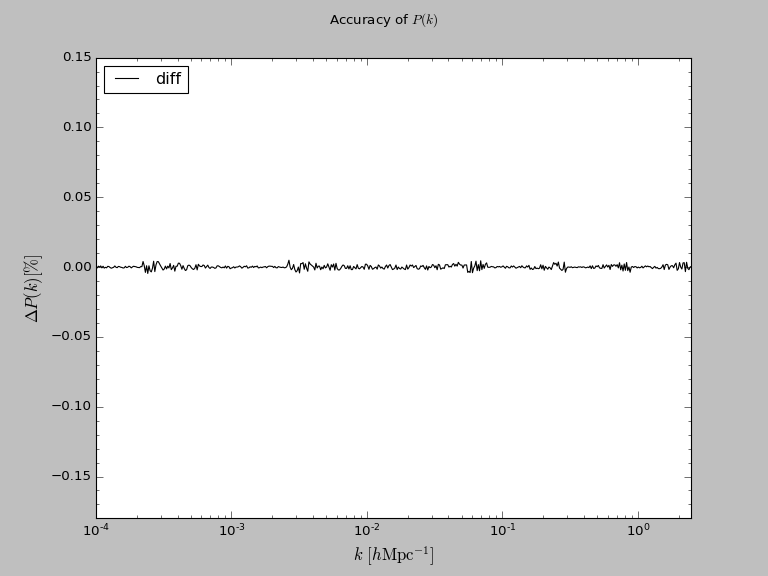

In [18]:
fig = plt.figure(figsize=(9.6,7.2))
fig.suptitle('Accuracy of $P(k)$',fontsize=12)

ax1 = plt.subplot()

#since the range for k's in fortran runs are shorter than in python runs, we interpolate in fortran's range
plt.plot(v4_info['matterpower'][0],100*(v5_info['matterpower'][1]-v4_info['matterpower'][1])/v4_info['matterpower'][1],
         '-k',label='diff')

plt.xlabel('$k$ $[h\mathrm{ Mpc}^{-1}]$',fontsize=15)
plt.xlim([1.e-4,2.48])
plt.xscale('log')
plt.ylabel('$\Delta P(k)[\%]$',fontsize=15)
plt.ylim([-0.18,0.15])
minorLocatorY = AutoMinorLocator()
ax1.yaxis.set_minor_locator(minorLocatorY)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3, color='black')

#plt.legend(prop={'size':12})
plt.legend(loc='upper left')